In [171]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import math
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import NearestNeighbors
import scipy.sparse
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

In [2]:
# import os
# import csv
# cwd= os.getcwd()    #present directory
# print('Current working directory:', cwd) 
# os.chdir('/Users/Advance/Downloads')


# with open('AmazonFashion.csv', 'r') as file:
#     reader = csv.DictReader(file)
#     for row in reader:
#         print(dict(row))
#         print("\n")
 
import pandas as pd

amazon = pd.read_csv("C:/Users/Advance/Downloads/AmazonFashion.csv")
amazon.head(10)
    

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,...,image/6,image/7,image/8,image/9,image/10,image/11,image/12,image/13,style/Size Name:,style/Style:
0,5,True,"10 20, 2014",A1D4G1SNUZWQOT,7106116521,Tracy,Exactly what I needed.,perfect replacements!!,1413763200,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,True,"09 28, 2014",A3DDWDH9PX2YX2,7106116521,Sonja Lau,"I agree with the other review, the opening is ...","I agree with the other review, the opening is ...",1411862400,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,False,"08 25, 2014",A2MWC41EW7XL15,7106116521,Kathleen,Love these... I am going to order another pack...,My New 'Friends' !!,1408924800,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,True,"08 24, 2014",A2UH2QQ275NV45,7106116521,Jodi Stoner,too tiny an opening,Two Stars,1408838400,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,False,"07 27, 2014",A89F3LQADZBS5,7106116521,Alexander D.,Okay,Three Stars,1406419200,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,True,"07 19, 2014",A29HLOUW0NS0EH,7106116521,Patricia R. Erwin,Exactly what I wanted.,Five Stars,1405728000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4,True,"05 31, 2014",A7QS961ROI6E0,7106116521,REBECCA S LAYTON,These little plastic backs work great. No mor...,Works great!,1401494400,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,3,True,"09 22, 2013",A1BB77SEBQT8VX,B00007GDFV,Darrow H Ankrum II,mother - in - law wanted it as a present for h...,bought as a present,1379808000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,3,True,"07 17, 2013",AHWOW7D1ABO9C,B00007GDFV,rosieO,"Item is of good quality. Looks great, too. But...",Buxton heiress collection,1374019200,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,3,True,"04 13, 2013",AKS3GULZE0HFC,B00007GDFV,M. Waltman,I had used my last el-cheapo fake leather ciga...,Top Clasp Broke Within 3 days!,1365811200,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Shape of the data
amazon.shape


(19999, 29)

In [6]:
#Taking subset of the dataset
amazon=amazon.iloc[:1048576,0:]


In [7]:
#Check the datatypes
amazon.dtypes
amazon.info()

overall                int64
verified                bool
reviewTime            object
reviewerID            object
asin                  object
reviewerName          object
reviewText            object
summary               object
unixReviewTime         int64
vote                 float64
style/Color:          object
style/Size:           object
image/0               object
style/Metal Type:     object
image/1               object
image/2               object
image/3               object
image/4               object
image/5               object
image/6               object
image/7               object
image/8               object
image/9               object
image/10              object
image/11              object
image/12              object
image/13              object
style/Size Name:      object
style/Style:          object
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   overall            19999 non-null  int64  
 1   verified           19999 non-null  bool   
 2   reviewTime         19999 non-null  object 
 3   reviewerID         19999 non-null  object 
 4   asin               19999 non-null  object 
 5   reviewerName       19996 non-null  object 
 6   reviewText         19975 non-null  object 
 7   summary            19993 non-null  object 
 8   unixReviewTime     19999 non-null  int64  
 9   vote               1412 non-null   float64
 10  style/Color:       11835 non-null  object 
 11  style/Size:        11933 non-null  object 
 12  image/0            303 non-null    object 
 13  style/Metal Type:  3 non-null      object 
 14  image/1            75 non-null     object 
 15  image/2            25 non-null     object 
 16  image/3            13 

In [8]:
#Five point summary 

amazon.describe()['overall'].T

count    19999.000000
mean         4.294015
std          1.144854
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: overall, dtype: float64

In [9]:
#to find max and min rating
MAX = amazon.overall.max()
print("Maximum rating is",MAX)
MIN = amazon.overall.min()
print("Minimum rating is",MIN)

Maximum rating is 5
Minimum rating is 1


In [10]:
#Check for missing values
print('Number of missing values across columns: \n',amazon.isnull().sum())


Number of missing values across columns: 
 overall                  0
verified                 0
reviewTime               0
reviewerID               0
asin                     0
reviewerName             3
reviewText              24
summary                  6
unixReviewTime           0
vote                 18587
style/Color:          8164
style/Size:           8066
image/0              19696
style/Metal Type:    19996
image/1              19924
image/2              19974
image/3              19986
image/4              19994
image/5              19995
image/6              19997
image/7              19997
image/8              19997
image/9              19998
image/10             19998
image/11             19998
image/12             19998
image/13             19998
style/Size Name:     16710
style/Style:         16659
dtype: int64


In [11]:
Amazon_F = amazon [["overall","verified","reviewTime","reviewerID","asin","reviewerName","reviewText","summary","unixReviewTime","vote"]]
Amazon_F

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote
0,5,True,"10 20, 2014",A1D4G1SNUZWQOT,7106116521,Tracy,Exactly what I needed.,perfect replacements!!,1413763200,NaN
1,2,True,"09 28, 2014",A3DDWDH9PX2YX2,7106116521,Sonja Lau,"I agree with the other review, the opening is ...","I agree with the other review, the opening is ...",1411862400,3.0
2,4,False,"08 25, 2014",A2MWC41EW7XL15,7106116521,Kathleen,Love these... I am going to order another pack...,My New 'Friends' !!,1408924800,NaN
3,2,True,"08 24, 2014",A2UH2QQ275NV45,7106116521,Jodi Stoner,too tiny an opening,Two Stars,1408838400,NaN
4,3,False,"07 27, 2014",A89F3LQADZBS5,7106116521,Alexander D.,Okay,Three Stars,1406419200,NaN
...,...,...,...,...,...,...,...,...,...,...
19994,5,True,"08 23, 2013",A2I8U2L6ZOLPP9,B000P0X15G,Hmama65,My son and daughter-in -law were vacationing i...,Awesome Sun Protection,1377216000,NaN
19995,5,False,"08 22, 2013",A38SLX4EMMLSTL,B000P0X15G,LC,We loved this hat. Baby looked super cute but ...,Great hat,1377129600,NaN
19996,5,True,"08 21, 2013",A24NGH58L8CWDT,B000P0X15G,Veronica Jones,I love the drawstring and the chin tie. Both m...,Great fitting hat,1377043200,NaN
19997,5,True,"08 20, 2013",A1NJ9OSQZOZB02,B000P0X15G,argentinamazing,I got it for my 6 months old. He wore it all s...,Great,1376956800,NaN


In [12]:
#Check for missing values
print('Number of missing values across columns: \n',Amazon_F.isnull().sum())

Number of missing values across columns: 
 overall               0
verified              0
reviewTime            0
reviewerID            0
asin                  0
reviewerName          3
reviewText           24
summary               6
unixReviewTime        0
vote              18587
dtype: int64


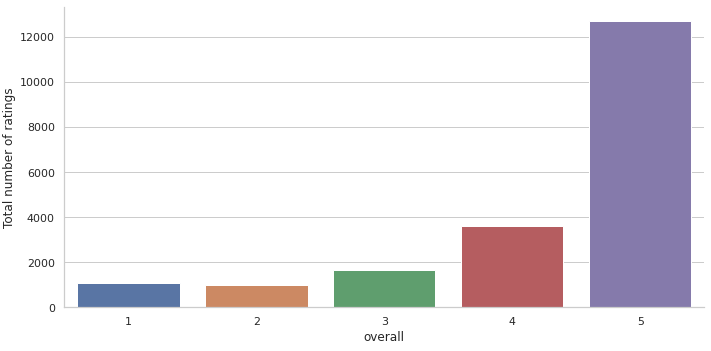

In [13]:
# Check the distribution of the rating
with sns.axes_style('white'):
    sns.set_theme(style="whitegrid")
    g = sns.factorplot("overall", data=Amazon_F, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")

In [14]:
# users Count based on ratings
for i in range(1,6):
  print('Number of users who rated {0} ratings = {1}'.format(i, Amazon_F[Amazon_F['overall'] == i].shape[0]))


Number of users who rated 1 ratings = 1078
Number of users who rated 2 ratings = 973
Number of users who rated 3 ratings = 1643
Number of users who rated 4 ratings = 3602
Number of users who rated 5 ratings = 12703


In [15]:
# Top 10 products based on rating
topmost_rated_products = Amazon_F.groupby('asin').size().sort_values(ascending=False)[:10]
topmost_rated_products


asin
B000KPIHQ4    4365
B000P0X15G    1758
B000JOOR7O    1578
B000GHRZN2    1408
B000GHMRLW    1408
B000K2PJ4K     936
B000ER9V68     715
B000NBIMG0     700
B00062NHH0     641
B000EE1NNA     536
dtype: int64

In [16]:
#Corrplot
corr = Amazon_F.corr()
corr

,overall,verified,unixReviewTime,vote
overall,1.000000,0.003348,0.011286,-0.005030
verified,0.003348,1.000000,0.315804,-0.006298
unixReviewTime,0.011286,0.315804,1.000000,-0.094330
vote,-0.005030,-0.006298,-0.094330,1.000000


<AxesSubplot:>

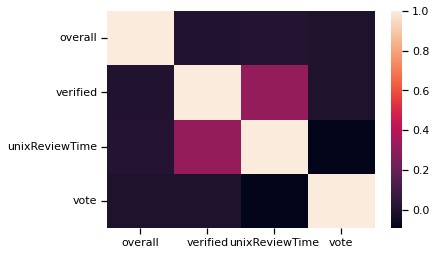

In [17]:
sns.heatmap(corr)

In [18]:
#unique user and products
print("Total data ")
print("-"*50)
print("\nTotal no of ratings :",Amazon_F.shape[0])
print("Total No of Users   :", len(np.unique(Amazon_F.reviewerID)))
print("Total No of products  :", len(np.unique(Amazon_F.asin)))


Total data 
--------------------------------------------------

Total no of ratings : 19999
Total No of Users   : 18320
Total No of products  : 141


In [19]:
#Number of rating per user
products_rated_per_user = Amazon_F.groupby(by='reviewerID')['overall'].count().sort_values(ascending=False)
products_rated_per_user.head(10)

#describing
products_rated_per_user.describe()


reviewerID
A3W11493KS6Z2L    5
ALJ66O1Y6SLHA     5
A3I8S99J38ODC3    4
A3IDT5LC91YJJU    4
A27QAEYVW0V5FC    4
A1C1NHT2ZZ5A4B    4
A1IJDQ9PPIGA3P    4
A6ILLZ8Y16XZV     4
A3JBOS2369RWAS    4
A1UF8LF658016W    4
Name: overall, dtype: int64

count    18320.000000
mean         1.091648
std          0.299491
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          5.000000
Name: overall, dtype: float64

In [20]:
#quantile
quantiles = products_rated_per_user.quantile(np.arange(0,1.01,0.01), interpolation='higher')
quantiles

0.00    1
0.01    1
0.02    1
0.03    1
0.04    1
       ..
0.96    2
0.97    2
0.98    2
0.99    2
1.00    5
Name: overall, Length: 101, dtype: int64

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'Quantiles and Values')

<AxesSubplot:title={'center':'Quantiles and Values'}>

Text(0, 0.5, 'No of ratings by Reviewer')

Text(0.5, 0, 'Value at the quantile')

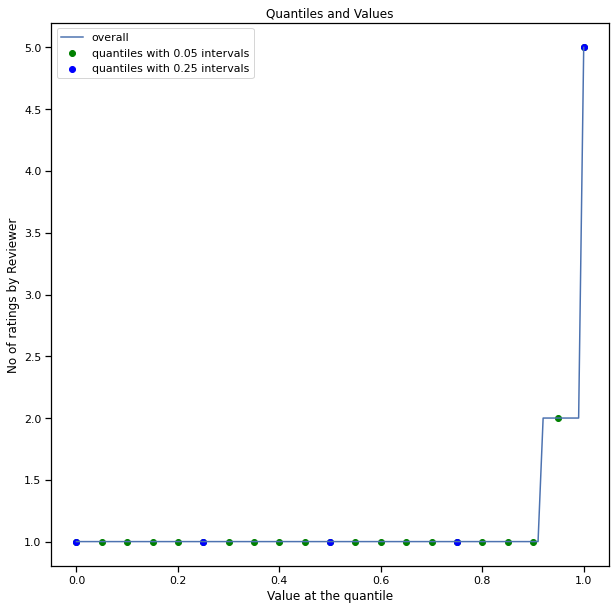


 No of rated product more than 5 per user : 2



In [21]:
plt.figure(figsize=(10,10))
plt.title("Quantiles and Values")
quantiles.plot()
# quantiles with 0.05 difference
plt.scatter(x=quantiles.index[::5], y=quantiles.values[::5], c='green', label="quantiles with 0.05 intervals")
# quantiles with 0.25 difference
plt.scatter(x=quantiles.index[::25], y=quantiles.values[::25], c='Blue', label = "quantiles with 0.25 intervals")
plt.ylabel('No of ratings by Reviewer')
plt.xlabel('Value at the quantile')
plt.legend(loc='best')
plt.show()


print('\n No of rated product more than 5 per user : {}\n'.format(sum(products_rated_per_user >= 5)) )


<Figure size 1080x360 with 0 Axes>

<AxesSubplot:xlabel='reviewerID'>

Text(0.5, 1.0, 'Top 5 reviewerID according to products purchase')

Text(0.5, 0, 'User Id')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'A3W11493KS6Z2L'),
  Text(1, 0, 'ALJ66O1Y6SLHA'),
  Text(2, 0, 'A3I8S99J38ODC3'),
  Text(3, 0, 'A3IDT5LC91YJJU'),
  Text(4, 0, 'A27QAEYVW0V5FC')])

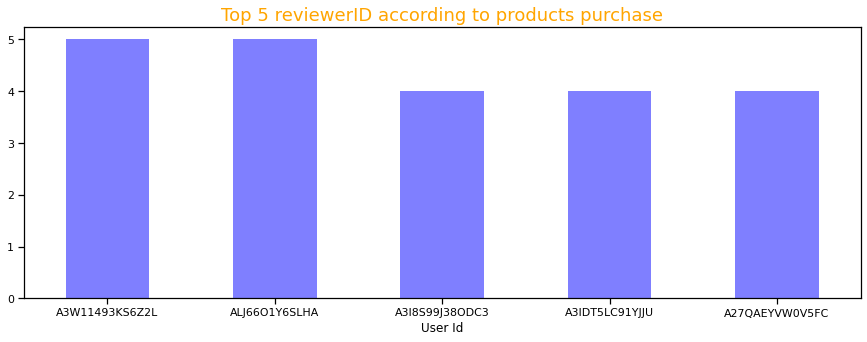

In [22]:
user = Amazon_F.groupby('reviewerID')['asin'].count().sort_values(ascending=False).head(5)

plt.figure(figsize=(15,5))
user.plot(kind="bar", color="blue", alpha=0.5)
plt.title("Top 5 reviewerID according to products purchase", size=18, color='orange')
plt.xlabel('User Id', size=12)
plt.xticks(rotation=0)
plt.show()


In [24]:
print('\n No of rated product more than 5 per user : {}\n'.format(sum(products_rated_per_user >= 5)) )


 No of rated product more than 5 per user : 2



In [27]:
#Getting the new dataframe which contains users who has given 3 or more ratings

new_df=Amazon_F.groupby("asin").filter(lambda x:x['overall'].count() >=5.0)

In [28]:
new_df

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote
0,5,True,"10 20, 2014",A1D4G1SNUZWQOT,7106116521,Tracy,Exactly what I needed.,perfect replacements!!,1413763200,NaN
1,2,True,"09 28, 2014",A3DDWDH9PX2YX2,7106116521,Sonja Lau,"I agree with the other review, the opening is ...","I agree with the other review, the opening is ...",1411862400,3.0
2,4,False,"08 25, 2014",A2MWC41EW7XL15,7106116521,Kathleen,Love these... I am going to order another pack...,My New 'Friends' !!,1408924800,NaN
3,2,True,"08 24, 2014",A2UH2QQ275NV45,7106116521,Jodi Stoner,too tiny an opening,Two Stars,1408838400,NaN
4,3,False,"07 27, 2014",A89F3LQADZBS5,7106116521,Alexander D.,Okay,Three Stars,1406419200,NaN
...,...,...,...,...,...,...,...,...,...,...
19994,5,True,"08 23, 2013",A2I8U2L6ZOLPP9,B000P0X15G,Hmama65,My son and daughter-in -law were vacationing i...,Awesome Sun Protection,1377216000,NaN
19995,5,False,"08 22, 2013",A38SLX4EMMLSTL,B000P0X15G,LC,We loved this hat. Baby looked super cute but ...,Great hat,1377129600,NaN
19996,5,True,"08 21, 2013",A24NGH58L8CWDT,B000P0X15G,Veronica Jones,I love the drawstring and the chin tie. Both m...,Great fitting hat,1377043200,NaN
19997,5,True,"08 20, 2013",A1NJ9OSQZOZB02,B000P0X15G,argentinamazing,I got it for my 6 months old. He wore it all s...,Great,1376956800,NaN


Text(0.5, 1.0, '# RATINGS per Product')

Text(0.5, 0, 'Product')

Text(0, 0.5, 'No of ratings per product')

[Text(-2500.0, 0, ''),
 Text(0.0, 0, ''),
 Text(2500.0, 0, ''),
 Text(5000.0, 0, ''),
 Text(7500.0, 0, ''),
 Text(10000.0, 0, ''),
 Text(12500.0, 0, ''),
 Text(15000.0, 0, ''),
 Text(17500.0, 0, ''),
 Text(20000.0, 0, '')]

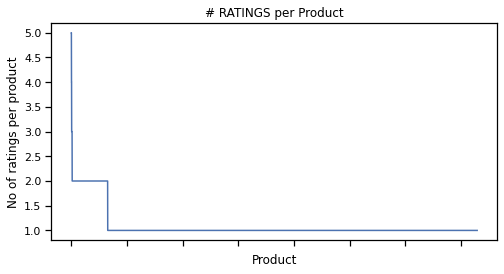

In [29]:
no_of_ratings_per_product = new_df.groupby(by='reviewerID')['overall'].count().sort_values(ascending=False)

fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(no_of_ratings_per_product.values)
plt.title('# RATINGS per Product')
plt.xlabel('Product')
plt.ylabel('No of ratings per product')
ax.set_xticklabels([])

plt.show()

###   { Build Popularity Recommender}


new_df.groupby('reviewerID')['overall'].mean().head()  # Mean rating and reviewer Id

In [31]:
new_df.groupby('reviewerID')['overall'].mean().sort_values(ascending=False).head()   # mean in ascending order

reviewerID
A2VU4R4LEAIRDJ    5.0
A38VNVZYXTLZD5    5.0
A38T01E8GIJDTD    5.0
A38T6KN3DAWIII    5.0
A38TBMV6A586PU    5.0
Name: overall, dtype: float64

In [33]:
new_df.groupby('reviewerID')['overall'].count().sort_values(ascending=False).head()   # finding the count 

reviewerID
ALJ66O1Y6SLHA     5
A3W11493KS6Z2L    5
A3IDT5LC91YJJU    4
A1C1NHT2ZZ5A4B    4
A27QAEYVW0V5FC    4
Name: overall, dtype: int64

In [34]:
ratings_mean_count = pd.DataFrame(new_df.groupby('reviewerID')['overall'].mean())

In [35]:
ratings_mean_count['rating_counts'] = pd.DataFrame(new_df.groupby('reviewerID')['overall'].count())  # calculating the ratings_count


In [36]:
ratings_mean_count.head()

,overall,rating_counts
reviewerID,,
A0190232T5E5IGR0GBDU,4.0,1
A0563004B08RY71KX411,3.0,1
A0650961HO7RGHL0IRPI,4.0,1
A1004HHMSDY5IP,3.0,1
A1009NEF74OBYG,1.0,1


In [37]:
ratings_mean_count['rating_counts'].max()

5

<Figure size 576x432 with 0 Axes>

<AxesSubplot:>

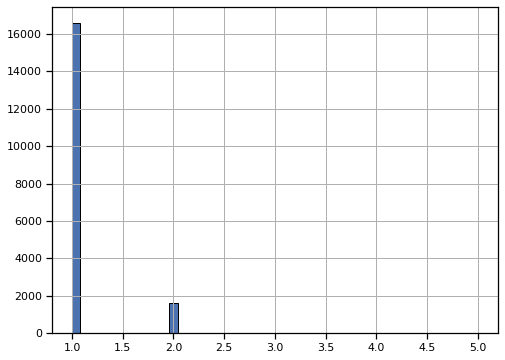

In [39]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating_counts'].hist(bins=50)

<Figure size 576x432 with 0 Axes>

<AxesSubplot:>

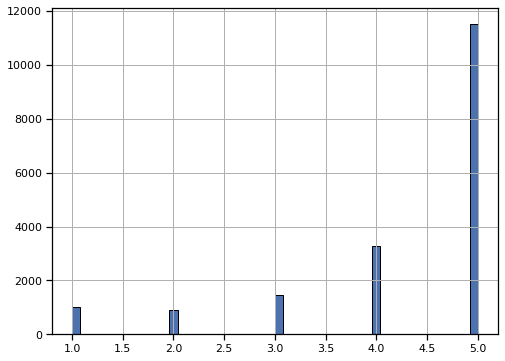

In [40]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['overall'].hist(bins=50)

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

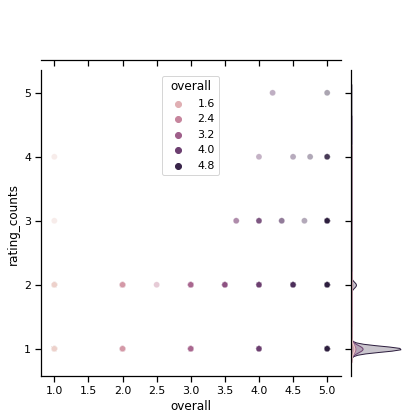

In [41]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='overall', y='rating_counts', data=ratings_mean_count, alpha=0.4,hue='overall')

<AxesSubplot:xlabel='reviewerID'>

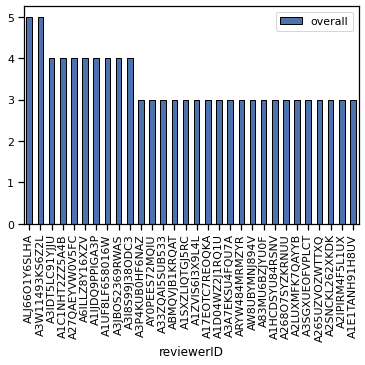

In [42]:
popular_products = pd.DataFrame(new_df.groupby('reviewerID')['overall'
                                                            ].count())
most_popular = popular_products.sort_values('overall', ascending=False)
most_popular.head(30).plot(kind = "bar")

### Filtering on basis of Collaberative Item Wise Recommendation MODEL II


In [ ]:
conda install -c conda-forge scikit-surprise # surprise package comes with scikit for recommendation systems

In [92]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
import os
from surprise.model_selection import train_test_split

In [93]:
new_df1 = new_df[['reviewerID','asin', 'overall']]
new_df1

,reviewerID,asin,overall
0,A1D4G1SNUZWQOT,7106116521,5
1,A3DDWDH9PX2YX2,7106116521,2
2,A2MWC41EW7XL15,7106116521,4
3,A2UH2QQ275NV45,7106116521,2
4,A89F3LQADZBS5,7106116521,3
...,...,...,...
19994,A2I8U2L6ZOLPP9,B000P0X15G,5
19995,A38SLX4EMMLSTL,B000P0X15G,5
19996,A24NGH58L8CWDT,B000P0X15G,5
19997,A1NJ9OSQZOZB02,B000P0X15G,5


In [45]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(new_df1,reader)

In [110]:
#Splitting the dataset
trainset, testset = train_test_split(data, test_size=0.3,random_state=10)
trainset 
#testset

In [109]:
algo = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [111]:
test_pred = algo.test(testset)

In [112]:
test_pred

[Prediction(uid='A3HMKQDPCNWPD5', iid='B00062NHH0', r_ui=5.0, est=4.296905291879084, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A1DUCI9JPAGX2E', iid='B000NBIMG0', r_ui=5.0, est=4.296905291879084, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A2W1XAKVSYT0CL', iid='B000EE1NNA', r_ui=3.0, est=4.296905291879084, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A161498ITHE630', iid='B000NBIMG0', r_ui=5.0, est=4.296905291879084, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A3NBEAP8PK8DVN', iid='B000KPIHQ4', r_ui=5.0, est=4.296905291879084, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='AXI8WKOOY4TLW', iid='B000KPIHQ4', r_ui=5.0, est=4.296905291879084, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A312P4Y6WJ31

In [50]:
# get RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

Item-based Model : Test Set
RMSE: 1.0951


1.0951133419480084

### Build User Based Collaborative Filtering model- Model Based Approach ModelIII

In [51]:

new_df1=new_df.head(10000)
ratings_matrix = new_df1.pivot_table(values='overall', index='reviewerID', columns='asin', fill_value=0)
ratings_matrix.head()

asin,7106116521,B00007GDFV,B00008JOQI,B00008JPRZ,B00008JQF0,B00008JVTT,B0000AWHAA,B0000AWXMM,B00015VKT4,B0002L2LGI,...,B000HOGHMO,B000HQ4P9O,B000HR77R0,B000HSTWY0,B000I5N5OK,B000IF0XQS,B000IUX7U2,B000J3ROES,B000JOOR7O,B000JPPOZ2
reviewerID,,,,,,,,,,,,,,,,,,,,,
A0190232T5E5IGR0GBDU,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.0,0
A0650961HO7RGHL0IRPI,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0
A1004HHMSDY5IP,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0
A1009NEF74OBYG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.0,0
A100WAE3LAZOE6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0


In [52]:
# Define reviewer index from 0 to 10
ratings_matrix['user_index'] = np.arange(0, ratings_matrix.shape[0], 1)
ratings_matrix.head()


asin,7106116521,B00007GDFV,B00008JOQI,B00008JPRZ,B00008JQF0,B00008JVTT,B0000AWHAA,B0000AWXMM,B00015VKT4,B0002L2LGI,...,B000HQ4P9O,B000HR77R0,B000HSTWY0,B000I5N5OK,B000IF0XQS,B000IUX7U2,B000J3ROES,B000JOOR7O,B000JPPOZ2,user_index
reviewerID,,,,,,,,,,,,,,,,,,,,,
A0190232T5E5IGR0GBDU,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4.0,0,0
A0650961HO7RGHL0IRPI,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0,1
A1004HHMSDY5IP,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0,2
A1009NEF74OBYG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.0,0,3
A100WAE3LAZOE6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0,4


In [53]:
# Finding the shape 
ratings_matrix.shape

(8558, 78)

In [54]:
# Transposing the matrix 
X = ratings_matrix.T
X.head()


reviewerID,A0190232T5E5IGR0GBDU,A0650961HO7RGHL0IRPI,A1004HHMSDY5IP,A1009NEF74OBYG,A100WAE3LAZOE6,A1019GAOMX6BGY,A1021P7FVGP7FA,A1037D806EY3SL,A104042GV5EM0U,A104GTX4GP75L1,...,AZVGOQYV4QR6J,AZVPLKOTY7QWU,AZVRKS8DMISM0,AZWDI8J58WQFW,AZXHS2CNCF3PO,AZXMEWZMRYAXF,AZYFPB15N5EB5,AZYIBG912W011,AZZ7YP08I4OZ6,AZZKYP9254H32
asin,,,,,,,,,,,,,,,,,,,,,
7106116521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00007GDFV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00008JOQI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00008JPRZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00008JQF0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
X.shape

(78, 8558)

In [56]:
X1 = X
X1

reviewerID,A0190232T5E5IGR0GBDU,A0650961HO7RGHL0IRPI,A1004HHMSDY5IP,A1009NEF74OBYG,A100WAE3LAZOE6,A1019GAOMX6BGY,A1021P7FVGP7FA,A1037D806EY3SL,A104042GV5EM0U,A104GTX4GP75L1,...,AZVGOQYV4QR6J,AZVPLKOTY7QWU,AZVRKS8DMISM0,AZWDI8J58WQFW,AZXHS2CNCF3PO,AZXMEWZMRYAXF,AZYFPB15N5EB5,AZYIBG912W011,AZZ7YP08I4OZ6,AZZKYP9254H32
asin,,,,,,,,,,,,,,,,,,,,,
7106116521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00007GDFV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00008JOQI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00008JPRZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00008JQF0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B000IUX7U2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B000J3ROES,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B000JOOR7O,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0


In [57]:
#Decomposing the Matrix
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(78, 10)

In [58]:
#Correlation Matrix

correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(78, 78)

In [59]:
#Correlation Matrix

X.index[75]

'B000JOOR7O'

In [60]:
i = "B000EB3RXM"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

49

In [ ]:
#Correlation for all items with the item purchased by this customer based on items rated by other customers people who bought the same product

In [61]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(78,)

In [62]:
Recommend = list(X.index[correlation_product_ID > 0.65])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:24]

['7106116521',
 'B00007GDFV',
 'B00008JOQI',
 'B00008JPRZ',
 'B00008JQF0',
 'B00008JVTT',
 'B0000AWHAA',
 'B0000AWXMM',
 'B00015VKT4',
 'B0002L2LGI',
 'B0002PR25Y',
 'B0002TGUU8',
 'B0002UQASO',
 'B0002Z1JNK',
 'B00061RG3M',
 'B00063VWSA',
 'B00063VWTY',
 'B00066G516',
 'B000673JT6',
 'B0006FUF68',
 'B0006FYTWY',
 'B0006HB4W0',
 'B0006IXEG8',
 'B0006Q3Q4A']

In [ ]:
#References:
 
    #Cannot install scikit-surprise on my jupyter notebook. (2020, May 27). Stack Overflow. https://stackoverflow.com/questions/62042317/cannot-install-scikit-surprise-on-my-jupyter-notebook
    #ImportError in importing from sklearn: cannot import name check_build. (2013, March 7). Stack Overflow. https://stackoverflow.com/questions/15274696/importerror-in-importing-from-sklearn-cannot-import-name-check-build
    

In [115]:
# References

#Evaluating Prediction Accuracy for Collaborative Filtering Algorithms in Recommender Systems
